<a href="https://colab.research.google.com/github/ankonH/Lab-Performance-ML-1/blob/main/212_35_744_Lab_Performance_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name: Arafat Hossain Ankon**
# **ID: 212-35-744**
# **Lab Performance**


---



---



# **Import Libraries**

In [77]:
!pip install openpyxl
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
!pip install shap
import shap

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# **Answer To The Question 1**

In [78]:
df = pd.read_excel('/content/Excel Project Dataset.xlsx', engine='openpyxl')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


**Basic Information of dataset**

In [79]:
print("Number of data points:", len(df))

print("Number of features:", len(df.columns))

print("\nData type of each feature:")
df.dtypes


Number of data points: 1026
Number of features: 13

Data type of each feature:


,0
ID,int64
Marital Status,object
Gender,object
Income,int64
Children,int64
Education,object
Occupation,object
Home Owner,object
Cars,int64
Commute Distance,object


**A descriptive summary of each feature**

In [80]:
print("\nDescriptive statistics of each feature:")
df.describe(include='all')

print("\nDescriptive summary of each feature:")
for col in df.columns:
    print(f"\nFeature: {col}")
    print(f"Data Type: {df[col].dtype}")
    print(f"Number of Unique Values: {df[col].nunique()}")
    print(f"Missing Values: {df[col].isnull().sum()}")
    if df[col].dtype == 'object':
        print(f"Unique Values: {df[col].unique()}")
    else:
        print(f"Minimum: {df[col].min()}")
        print(f"Maximum: {df[col].max()}")
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Standard Deviation: {df[col].std()}")



Descriptive statistics of each feature:

Descriptive summary of each feature:

Feature: ID
Data Type: int64
Number of Unique Values: 1000
Missing Values: 0
Minimum: 11000
Maximum: 29447
Mean: 19969.19688109162
Median: 19744.0
Standard Deviation: 5332.6729420212805

Feature: Marital Status
Data Type: object
Number of Unique Values: 2
Missing Values: 0
Unique Values: ['M' 'S']

Feature: Gender
Data Type: object
Number of Unique Values: 2
Missing Values: 0
Unique Values: ['F' 'M']

Feature: Income
Data Type: int64
Number of Unique Values: 16
Missing Values: 0
Minimum: 10000
Maximum: 170000
Mean: 56208.57699805068
Median: 60000.0
Standard Deviation: 31293.284006705195

Feature: Children
Data Type: int64
Number of Unique Values: 6
Missing Values: 0
Minimum: 0
Maximum: 5
Mean: 1.8927875243664718
Median: 2.0
Standard Deviation: 1.6266699869725811

Feature: Education
Data Type: object
Number of Unique Values: 5
Missing Values: 0
Unique Values: ['Bachelors' 'Partial College' 'High School' 'Par

**Find out if there is any data imbalance or**
**skewed numeric feature.**


In [81]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nFeature: {col}")
        print(df[col].value_counts(normalize=True) * 100)


for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        skewness = df[col].skew()
        print(f"\nFeature: {col}")
        print(f"Skewness: {skewness}")
        if abs(skewness) > 0.5:
            print("The feature is potentially skewed.")



Feature: Marital Status
Marital Status
M    53.508772
S    46.491228
Name: proportion, dtype: float64

Feature: Gender
Gender
M    51.169591
F    48.830409
Name: proportion, dtype: float64

Feature: Education
Education
Bachelors              30.311891
Partial College        27.095517
High School            17.933723
Graduate Degree        17.056530
Partial High School     7.602339
Name: proportion, dtype: float64

Feature: Occupation
Occupation
Professional      27.290448
Skilled Manual    25.243665
Clerical          18.226121
Management        16.959064
Manual            12.280702
Name: proportion, dtype: float64

Feature: Home Owner
Home Owner
Yes    67.933723
No     32.066277
Name: proportion, dtype: float64

Feature: Commute Distance
Commute Distance
0-1 Miles     36.842105
5-10 Miles    19.200780
1-2 Miles     17.153996
2-5 Miles     15.789474
10+ Miles     11.013645
Name: proportion, dtype: float64

Feature: Region
Region
North America    49.512671
Europe           30.799220
Pac

# **Answer To The Question 2**

**Null Value check**

In [82]:
df.isnull().sum()

,0
ID,0
Marital Status,0
Gender,0
Income,0
Children,0
Education,0
Occupation,0
Home Owner,0
Cars,0
Commute Distance,0


**Question:**  Explain why you think
removal or imputation is best.


---


**Answer:**
Use **removal** if missing data is **small and random** to avoid bias. Use **imputation** if missing data is **substantial or non-random** to retain important information. A **hybrid approach** works when necessary.


Convert gender feature into numeric

Convert 'Gender' feature into numeric

In [83]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


# **Answer To The Question 3**

**Visualize our data using different charts**

<ipython-input-84-f247b44d9eab>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
<ipython-input-84-f247b44d9eab>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
<ipython-input-84-f247b44d9eab>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x=df[col], palette="viridis")
<ipython-input-84-f247b44d9eab>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")
<ipython-input-84-f247b44d9eab>:10: FutureWarn

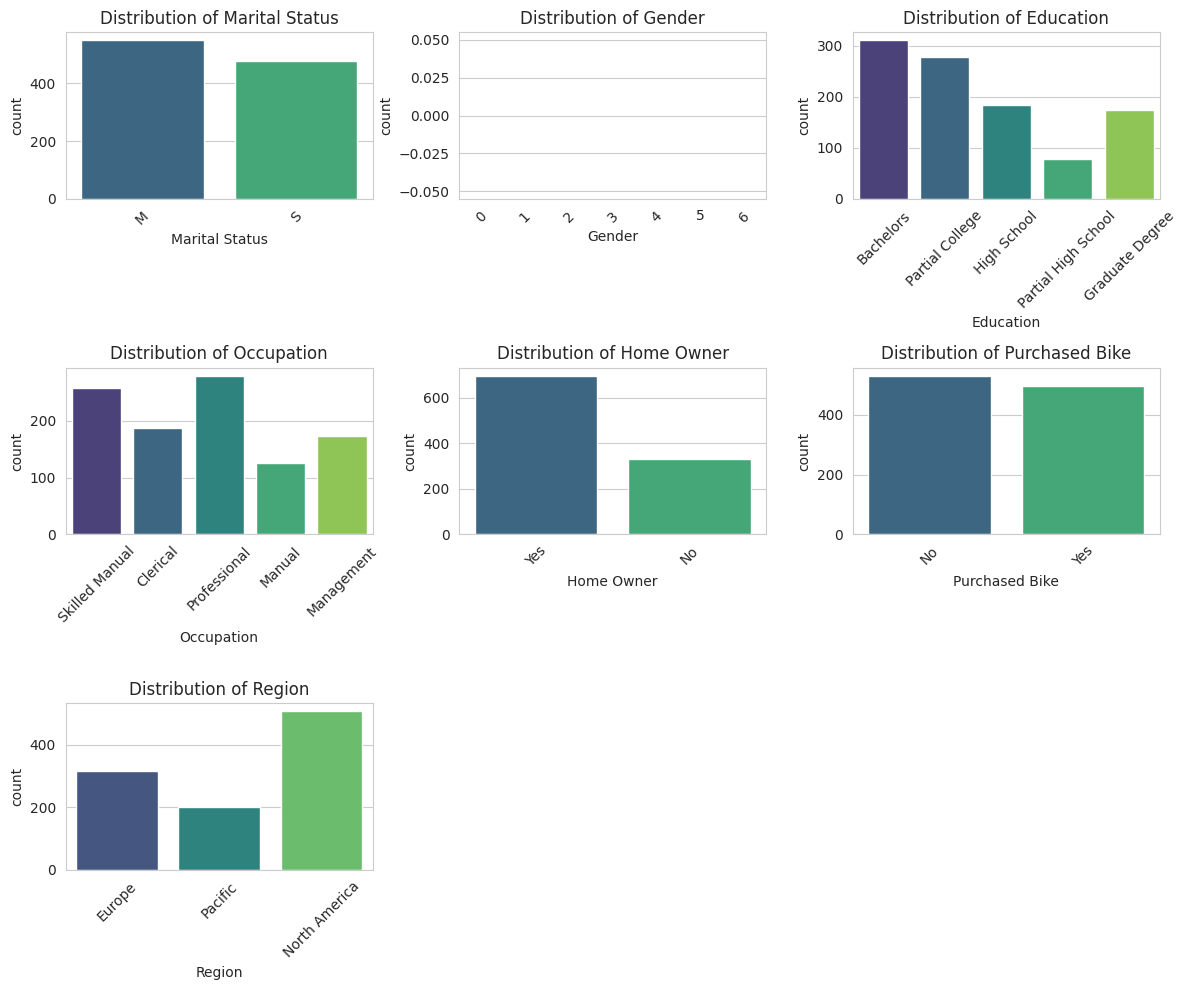

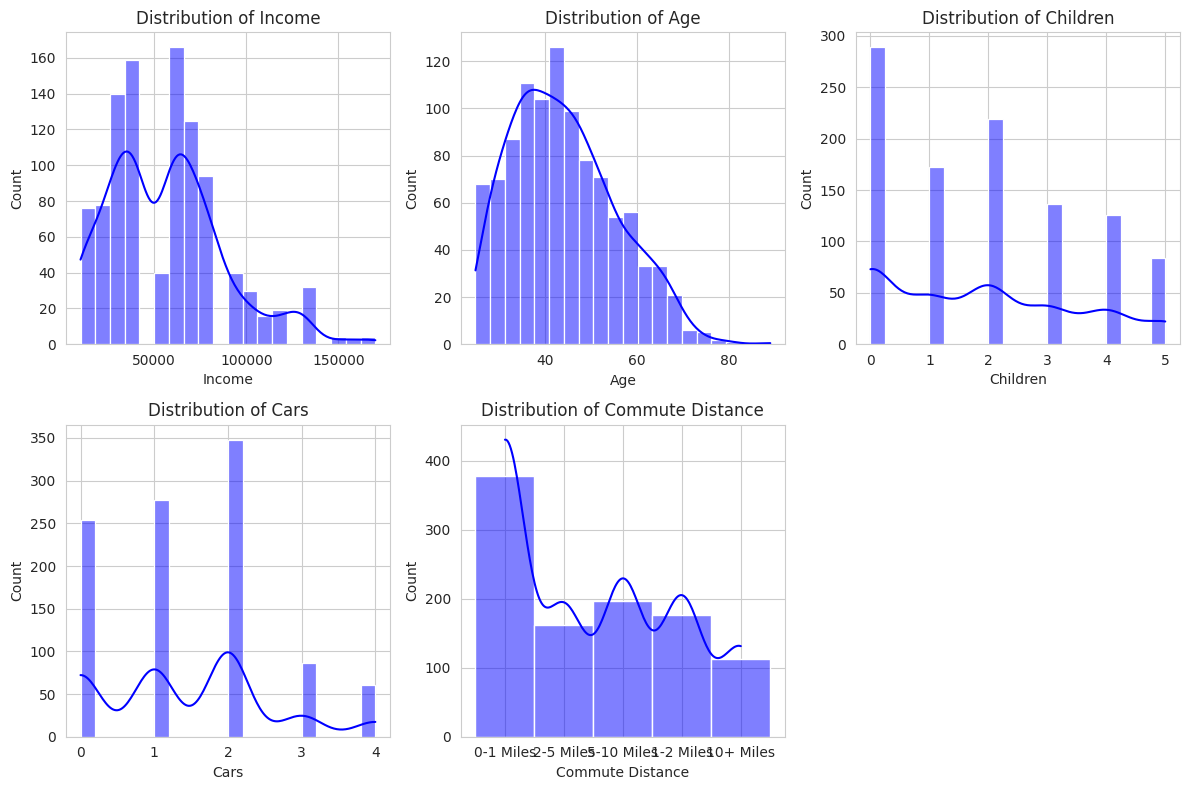

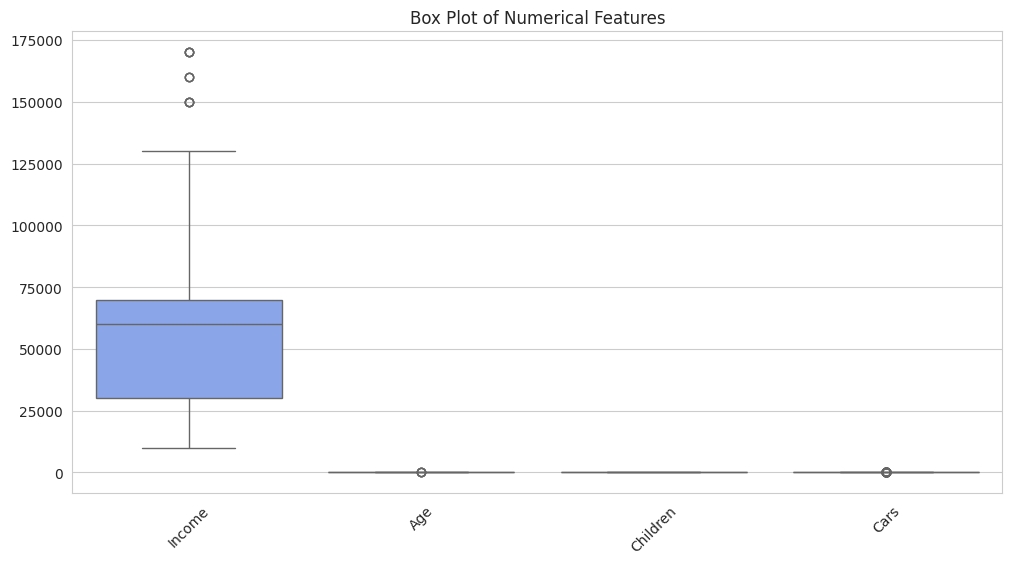

In [84]:
sns.set_style("whitegrid")

categorical_features = ["Marital Status", "Gender", "Education", "Occupation", "Home Owner", "Purchased Bike", "Region"]
numerical_features = ["Income", "Age", "Children", "Cars", "Commute Distance"]


plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[col], palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_features], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.show()


# **Answer To The Question 4**

**Determine if there is any correlation between the numeric features of our dataset**

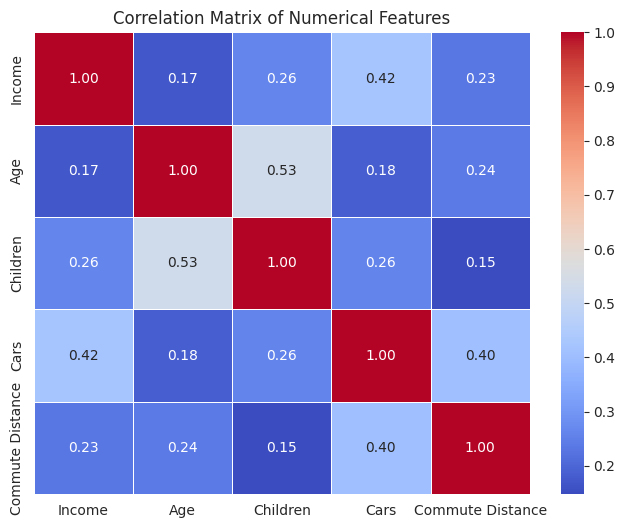

In [85]:
distance_mapping = {
    '0-1 Miles': 0.5,  # Assuming the midpoint of the range
    '1-2 Miles': 1.5,
    '2-5 Miles': 3.5,
    '5-10 Miles': 7.5,
    '10+ Miles': 10  # Assuming 10 or more miles
}


df['Commute Distance'] = df['Commute Distance'].map(distance_mapping)


plt.figure(figsize=(8, 6))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# **Answer To The Question 5**

**Train our dataset using Random Forest Classifier**

In [86]:
X = df.drop('Purchased Bike', axis=1)
y = df['Purchased Bike']


if pd.api.types.is_string_dtype(y):
  y = y.astype('category').cat.codes


categorical_features = ["Marital Status", "Gender", "Education", "Occupation", "Home Owner", "Region"]
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


# Evaluate the model
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 1.0
Test Accuracy: 0.7766990291262136


# **Answer To The Question 6**

**Train machine learning model using 10-fold cross-validation and find average test accuracy with 95% confidence interval.**

In [87]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')


mean_cv_accuracy = np.mean(cv_scores)
std_cv_accuracy = np.std(cv_scores)
lower_bound = mean_cv_accuracy - 1.96 * (std_cv_accuracy / np.sqrt(10))
upper_bound = mean_cv_accuracy + 1.96 * (std_cv_accuracy / np.sqrt(10))


print(f"Average Validation Accuracy (10-fold CV): {mean_cv_accuracy:.4f}")
print(f"95% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")
print(f"Test Accuracy: {test_accuracy:.4f}")



n_iterations = 1000
boot_accuracies = []
for _ in range(n_iterations):
    indices = np.random.choice(len(y_test), len(y_test), replace=True)
    y_test_boot = y_test.iloc[indices]
    y_pred_boot = y_pred[indices]
    boot_accuracies.append(accuracy_score(y_test_boot, y_pred_boot))

boot_mean_accuracy = np.mean(boot_accuracies)
boot_std_accuracy = np.std(boot_accuracies)
boot_lower_bound = boot_mean_accuracy - 1.96 * (boot_std_accuracy / np.sqrt(len(y_test)))
boot_upper_bound = boot_mean_accuracy + 1.96 * (boot_std_accuracy / np.sqrt(len(y_test)))

print(f"\nBootstrapped Test Accuracy: {boot_mean_accuracy:.4f}")
print(f"95% Confidence Interval (Bootstrapping): ({boot_lower_bound:.4f}, {boot_upper_bound:.4f})")


Average Validation Accuracy (10-fold CV): 0.7553
95% Confidence Interval: (0.7323, 0.7784)
Test Accuracy: 0.7767

Bootstrapped Test Accuracy: 0.7773
95% Confidence Interval (Bootstrapping): (0.7733, 0.7813)


# **Answer To The Question 7**

**Train our dataset decision tree algorithm and tune at least 5 hyperparameters using GridSearchCV**

In [88]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


tree_classifier = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(estimator=tree_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)



print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


best_tree_model = grid_search.best_estimator_
y_pred = best_tree_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of Best Model: {test_accuracy}")


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.6829268292682926
Test Accuracy of Best Model: 0.6796116504854369


# **Answer To The Question 8**

**Find out the SHAP values of each feature and give explanation of them**


Feature Importances:
                          Feature  Importance
0                              ID    0.222097
5                             Age    0.202109
1                          Income    0.103430
2                        Children    0.090047
3                            Cars    0.078837
4                Commute Distance    0.066343
6                Marital Status_S    0.039792
16           Region_North America    0.031635
15                 Home Owner_Yes    0.031049
10  Education_Partial High School    0.023193
7       Education_Graduate Degree    0.016606
14      Occupation_Skilled Manual    0.015368
12              Occupation_Manual    0.014769
11          Occupation_Management    0.013916
9       Education_Partial College    0.013588
8           Education_High School    0.013361
17                 Region_Pacific    0.012714
13        Occupation_Professional    0.011147


<Figure size 640x480 with 0 Axes>

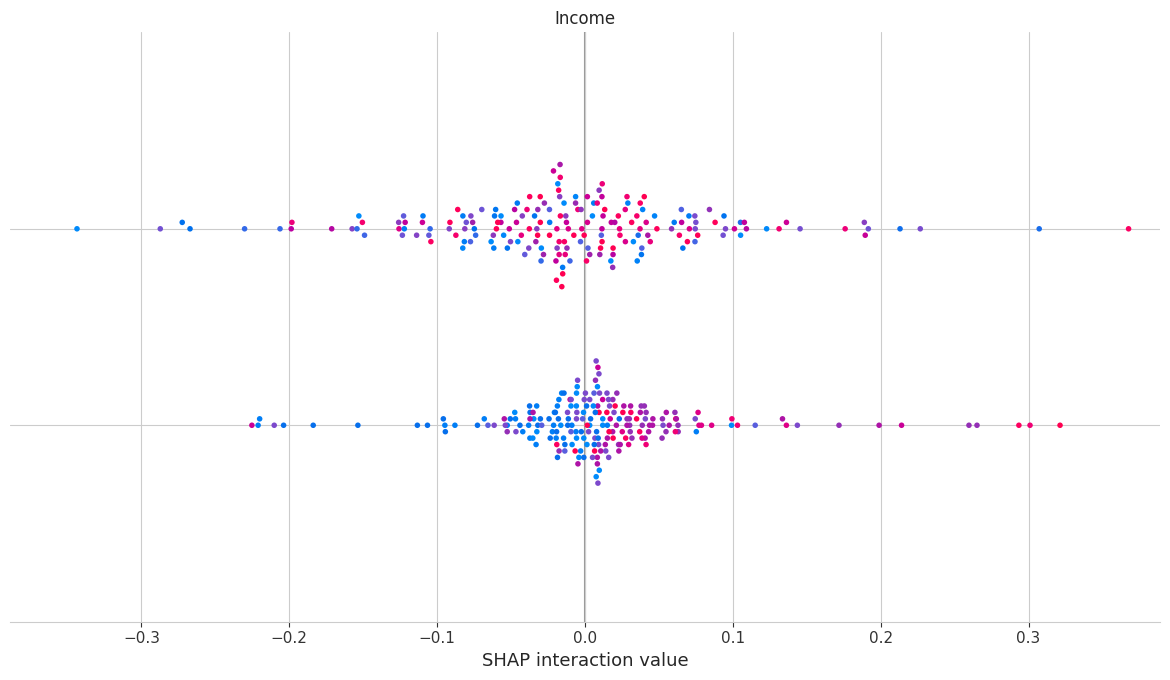

In [89]:
feature_importances = best_tree_model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance_df)


explainer = shap.TreeExplainer(best_tree_model)
shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values, X_test, plot_type="bar")




Explanation of SHAP values:


---


SHAP values quantify the contribution of each feature to a prediction.  A positive SHAP value indicates that a feature pushed the prediction higher (towards the positive class, in classification), while a negative SHAP value indicates that the feature pushed the prediction lower (towards the negative class).  The magnitude of the SHAP value represents the strength of the feature's contribution.

The summary plot shows the average impact of each feature across all predictions.  The bar plot ordering provides a quick view of the most important features.  The individual force plots provide a detailed view of how the features contributed to a particular prediction.


# **Answer To The Question 9**

**Evalution of Model**

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       103
           1       0.72      0.59      0.65       103

    accuracy                           0.68       206
   macro avg       0.69      0.68      0.68       206
weighted avg       0.69      0.68      0.68       206



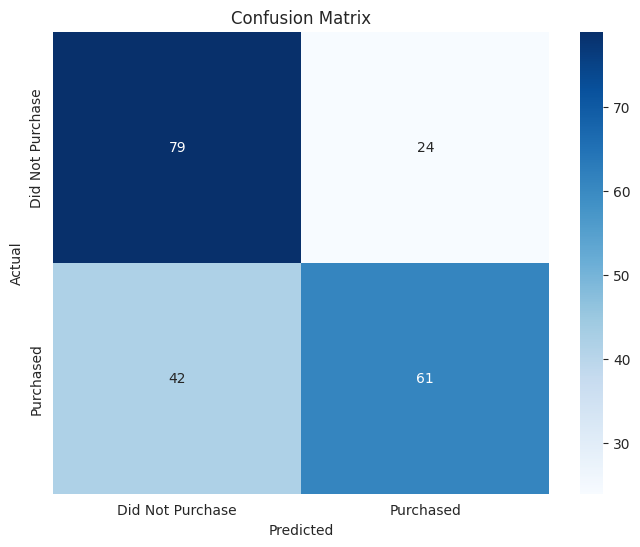

In [90]:
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Did Not Purchase", "Purchased"],
            yticklabels=["Did Not Purchase", "Purchased"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# **Answer To The Question 10**

**Train at least 5 ensemble algorithms**

In [91]:
ensemble_models = {
    "Bagging": BaggingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "Voting": VotingClassifier(estimators=[('rf', model), ('et', ExtraTreesClassifier(random_state=42))], voting='hard')
}


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)



ensemble_results = {}
for name, model in ensemble_models.items():

    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)

    accuracy = accuracy_score(y_test, y_pred)
    ensemble_results[name] = accuracy


print("\nEnsemble Model Accuracy:")
for name, accuracy in ensemble_results.items():
    print(f"{name}: {accuracy}")

print(f"\nDecision Tree Test Accuracy (Best Model): {test_accuracy}")


best_ensemble_model = max(ensemble_results, key=ensemble_results.get)
best_ensemble_accuracy = ensemble_results[best_ensemble_model]

if best_ensemble_accuracy > test_accuracy:
    print(f"\nBest Model: {best_ensemble_model} with accuracy {best_ensemble_accuracy}")
else:
    print(f"\nBest Model: Decision Tree with accuracy {test_accuracy}")



Ensemble Model Accuracy:
Bagging: 0.7233009708737864
AdaBoost: 0.6456310679611651
GradientBoosting: 0.7330097087378641
ExtraTrees: 0.7330097087378641
Voting: 0.7475728155339806

Decision Tree Test Accuracy (Best Model): 0.6796116504854369

Best Model: Voting with accuracy 0.7475728155339806


# **Answer To The Question 11**

**K-Means clustering algorithm**

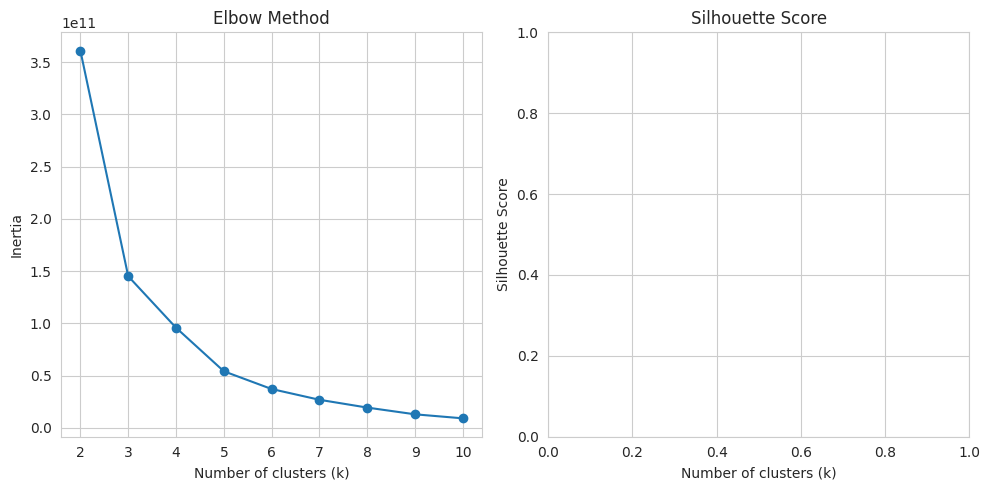

In [96]:
numerical_features = ["Income", "Age", "Children", "Cars", "Commute Distance"]
X_cluster = df[numerical_features]


imputer = SimpleImputer(strategy='mean')
X_cluster = imputer.fit_transform(X_cluster)



inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')


plt.subplot(1, 2, 2)



plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()



optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(X_cluster)


df['Cluster'] = kmeans.labels_



# **Answer To The Question 12**

**Select the best number of clusters by**
**generating a dendrogram.**

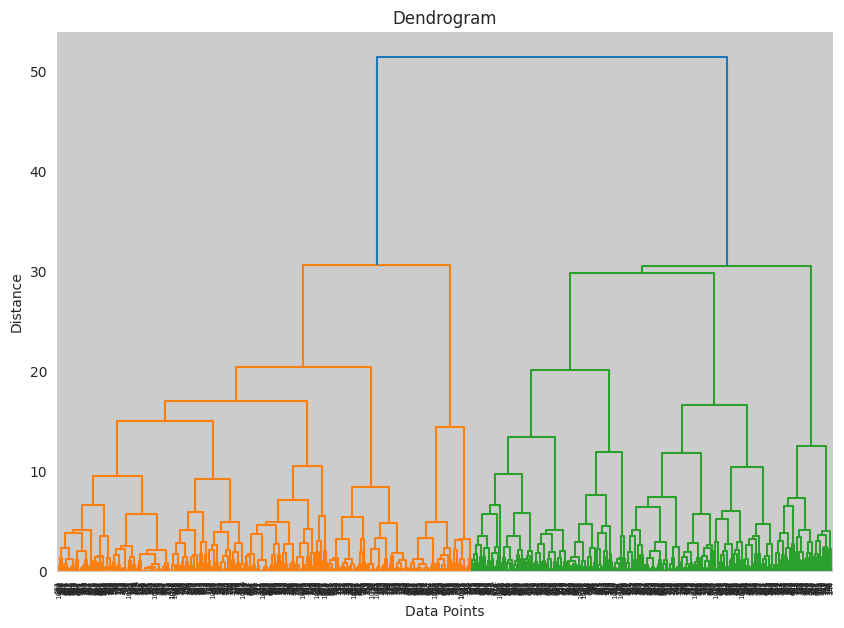

In [97]:
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)


linked = linkage(X_cluster_scaled, 'ward')


plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
